--successfully loaded Iris dataset...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

--- K-Value Optimization ---
Optimal K found: 1 (Accuracy: 0.9333)


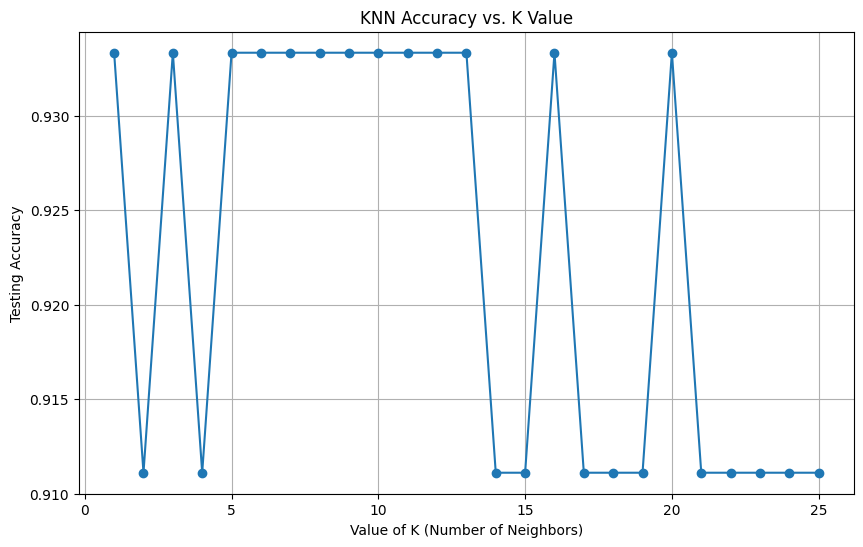


--- Final Model Metrics (K=1) ---
Final Test Accuracy: 0.9333
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [1]:
# --- Import Dependencies ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1. Load and Initial Clean ---
try:
    df = pd.read_csv('Iris.csv') 
    print("--successfully loaded Iris dataset...")
except FileNotFoundError:
    print("--file not found. Please enter the correct filepath.")
    exit()

# Check for unnecessary columns (like 'Id') and drop them
print(df.info())
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

# --- 2. Encode Target Variable ---
# Label Encoding is suitable for Multi-Class classification targets.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species_Encoded'] = le.fit_transform(df['Species'])
df.drop('Species', axis=1, inplace=True)

# Define X and Y
Y = df['Species_Encoded']
X = df.drop('Species_Encoded', axis=1)

# --- 3. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y 
    # Use stratify=Y to ensure class balance in both train and test sets
)

# --- 4. Normalize Features (Mandatory for KNN) ---
# RATIONALE: KNN relies on distance calculation (Euclidean). Features on larger 
# scales (e.g., petal length) would disproportionately influence the distance.
scaler = MinMaxScaler()

# Fit only on training data to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

# --- 5. Experiment with K (Finding the Optimal K) ---

k_range = range(1, 26) # Test K from 1 to 25
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))

# Find optimal K and best accuracy
best_k = scores.index(max(scores)) + 1
best_accuracy = max(scores)

print("\n--- K-Value Optimization ---")
print(f"Optimal K found: {best_k} (Accuracy: {best_accuracy:.4f})")

# Optional: Plot K vs. Accuracy (Highly Recommended for Hint 3)
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('Value of K (Number of Neighbors)')
plt.ylabel('Testing Accuracy')
plt.grid(True)
plt.show()

# --- 6. Final Model Training and Evaluation ---

# Train final model using the optimal K found
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

# Final Metrics
final_accuracy = accuracy_score(y_test, y_pred_final)
cm = confusion_matrix(y_test, y_pred_final)

print("\n--- Final Model Metrics (K={}) ---".format(best_k))
print(f"Final Test Accuracy: {final_accuracy:.4f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))